In [6]:
#######################
# standard code block #
#######################

% pylab inline #MAGIC FUNCTION - imprts numpy, matplotlib
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%config InlineBackend.figure_format = 'svg'

UsageError: Line magic function `%` not found.


# Introduction to Pandas

## From the Pandas Documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###

Pandas has an official 10 minute intro.

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set Up Pandas Default Parameters

In [52]:
# imports a library 'pandas', names it as 'pd'
# this is a common convention
import pandas as pd
import numpy as np

In [53]:
# if you run into trouble, it's often helpful to know which version you're on
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 0.25.3
Numpy version: 1.17.4


In [54]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data Structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. DataFrames

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

## So, What is a Pandas DataFrame?

In [55]:
pd.Series?

In [56]:
## Make a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [57]:
pd.DataFrame?

In [58]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df1

,A,B,C,D
0,-1.155,0.414,0.438,-1.754
1,0.080,0.388,4.450,0.071
2,-0.889,0.238,-1.699,0.158
3,-1.901,-0.008,-0.331,-0.350
4,-0.823,0.312,-0.360,1.111
5,1.556,1.446,-0.959,0.991


In [59]:
#create a dataframe piece by piece
# two square brackets are needed!!
df2 = pd.DataFrame([[1,2,3], [4,5,6]], columns =list('ABC')) # enter data row by row
df2

,A,B,C
0,1,2,3
1,4,5,6


In [60]:
#how to create one column using dataframe not series
df3 = pd.DataFrame([1,2,3], columns = ['name']) # the column name has to be a list!!
df3   #single square bracket = COLUMN

df4 = pd.DataFrame([[1,2,3]], columns = ['name', 'b','c']) #double square brackets = ROW
df3

,name
0,1
1,2
2,3


In [61]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Load a Data Set

### "Census Income" Dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [62]:
# download the data and name the columns
cols = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
    'income'
]

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=cols) #assigns header name

### Q: What's happening in the above cell?

In [63]:
# created a list which contains titles in "cols"
#df is the dataframe that holds the dta from the adult.data, and the titles have been assigned to cols

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [64]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### head

Displays the first few rows in the dataframe

In [65]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### tail

Displays the last few rows in the dataframe

In [66]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### sample

Displays a sample of rows in the dataframe

In [67]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state = 42)
#random_state ensures that the same sample runs again (42 is the name of the state, can be changed)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Q: What do you expect to happen when you re-run the cell?

What actually happens? Why?

In [68]:
#I would expect new 5 samples to appear, but instead the same 5 samples appears.

### Columns

Returns a list of columns in the dataframe

In [69]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [70]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename Columns

In [71]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [72]:
# replace a column name
df.rename(columns={'country_of_origin': 'native_country'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Q: What does `in_place` do above?

In [73]:
#changes the title name in the list itself, i.e does not return a new list

## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### describe

Displays summary statistic for each numerical column

In [74]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts

Counts the number of occurrences of each categorical value for the column

In [75]:
df['education']

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object

In [76]:
df.education # also does the same thing but the .eduction method might be innacurate if there are 
#extra spaces in the names

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object

In [77]:
type(df.education)

pandas.core.series.Series

In [78]:
df.education.value_counts()

## Also works for numeric columns - treating the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [79]:
type(df.education.value_counts())

pandas.core.series.Series

In [80]:
df.education.value_counts().sort_index() #to sort by index and not descending order

 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: education, dtype: int64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


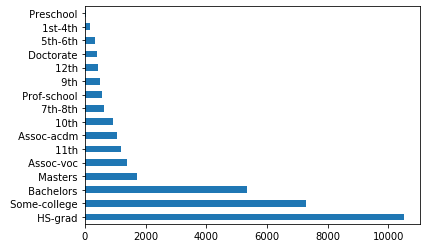

In [81]:
df.education.value_counts().plot('barh') # use ; at end to remove the statement above the plot

In [82]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

40.437455852092995

### Q: What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [83]:
type(df['hours_per_week'].mean())

float

### Unique

Returns the unique values for the column

In [84]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [85]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [86]:
df["education"] = df.education.str.strip()

In [87]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [88]:
df.gender.unique()

array([' Male', ' Female'], dtype=object)

In [89]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [90]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Selecting Rows and Columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [91]:
# select a row
df.iloc[3]

age                                53
workclass                     Private
fnlwgt                         234721
education                        11th
education_num                       7
marital_status     Married-civ-spouse
occupation          Handlers-cleaners
relationship                  Husband
ethnicity                       Black
gender                           Male
capital_gain                        0
capital_loss                        0
hours_per_week                     40
native_country          United-States
income                          <=50K
Name: 3, dtype: object

In [92]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [93]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [94]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [95]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [96]:
# select a row
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### Q: Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [97]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [98]:
df.iloc[0:2, 2:6]

,fnlwgt,education,education_num,marital_status
0,77516,Bachelors,13,Never-married
1,83311,Bachelors,13,Married-civ-spouse


## Filtering

In [99]:
(df.age > 50)

0        False
1        False
2        False
3         True
4        False
         ...  
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, Length: 32561, dtype: bool

In [100]:
asd = df[df.age > 50].groupby('education').mean()
asd

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,60.064,176764.717,6.0,776.749,46.900,38.259
11th,60.412,176110.841,7.0,275.907,23.462,35.560
12th,57.864,173884.879,8.0,640.288,25.015,41.091
1st-4th,61.014,214404.740,2.0,187.562,75.562,35.890
5th-6th,61.128,196499.431,3.0,350.477,76.780,36.505
7th-8th,62.390,168386.010,4.0,338.816,44.790,36.829
9th,60.675,186503.987,5.0,838.962,10.450,37.337
Assoc-acdm,57.864,186612.394,12.0,941.909,68.023,38.182
Assoc-voc,58.769,181849.203,11.0,1187.807,102.665,38.892


In [101]:
# Filter for only certain Columns
#df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?
# an error

In [102]:
df[df.age > 50].head(4)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Now Filter on Gender

In [103]:
df.gender == 'Male'

0         True
1         True
2         True
3         True
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Name: gender, Length: 32561, dtype: bool

In [104]:
df.loc[df.gender == 'Male']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [105]:
df.loc[df.gender == 'Male', ['age'] ]

,age
0,39
1,50
2,38
3,53
7,52
...,...
32553,32
32554,53
32555,22
32557,40


## Now Filter on Gender and Age Between 30 and 40

In [106]:
(df.gender == 'Male') & (df.age >= 30) & (df.age <= 40)

0         True
1        False
2         True
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [107]:
(df.age >= 30) & (df.gender == 'Male')

df.loc[(df.age >= 30) & (df.gender == 'Male') & (df.age <= 40), :]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32537,30,Private,345898,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


## Find Nulls

In [108]:
# as we saw with df.info() there are no nulls...
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income


## Fill Nulls

In [109]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
#null_df = pd.DataFrame([1, 2, 4, np.nan], columns=list('AV'))

In [110]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [111]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1.0
1       2.0
2       4.0
3    1000.0
Name: column1, dtype: float64

In [112]:
# fillna does not do it inplace unless you specify
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [113]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [114]:
null_df.fillna('random_string')

,column1
0,1.0
1,2.0
2,4.0
3,2.0


## Drop Nulls

In [134]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [116]:
null_df.dropna(how = 'any') #any means the entire row has to be null in order to be dropped

,column1
0,1.0
1,2.0
2,4.0


In [117]:
# .isnull() and .notnull() do opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [118]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [119]:
df.groupby('relationship').count() #all the columns in df are shown
#df[['relationship','age']].groupby('relationship').count() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
relationship,,,,,,,,,,,,,,
Husband,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193,13193
Not-in-family,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305,8305
Other-relative,981,981,981,981,981,981,981,981,981,981,981,981,981,981
Own-child,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068,5068
Unmarried,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446
Wife,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568


In [120]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['age']).mean()

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,,,,,
17,185722.233,6.648,109.691,41.752,21.367
18,193530.207,8.153,102.058,44.336,25.913
19,204803.544,9.097,92.093,43.916,30.678
20,198537.705,9.345,82.786,33.299,32.280
21,200116.997,9.435,204.625,51.636,34.035
...,...,...,...,...,...
85,126667.333,10.333,0.000,0.000,29.333
86,149912.000,14.000,0.000,0.000,40.000
87,90338.000,9.000,0.000,0.000,2.000


In [121]:
df[['education','age']]

,education,age
0,Bachelors,39
1,Bachelors,50
2,HS-grad,38
3,11th,53
4,Bachelors,28
...,...,...
32556,Assoc-acdm,27
32557,HS-grad,40
32558,HS-grad,58
32559,HS-grad,22


In [122]:
df.groupby([
    'education',
    'age',]).sum()


fnlwgt  education_num  capital_gain  capital_loss  \
education    age                                                        
10th         17   25821405            828         36799          6408   
             18    7937394            228             0             0   
             19    3811326             96             0          1602   
             20    3588186             90             0             0   
             21    4369918            102          3908             0   
...                    ...            ...           ...           ...   
Some-college 81     593515             30             0             0   
             82     173329             20             0             0   
             84     172907             10             0             0   
             88      68539             10             0             0   
             90     923546             60             0             0   

                  hours_per_week  
education    age                  
10th         17             2973  
             18             1060  
             19              552  
             20              591  
             21              663  
...                          ...  
Some-college 81               39  
             82               23  
             84               35  
             88               40  
             90              197  

[965 rows x 5 columns]

In [123]:
df.groupby([
    'education',
    'age',
])[['hours_per_week', 'capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
...                          ...           ...
Some-college 81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

In [124]:
df.groupby(['income', 'native_country']).agg({'capital_gain': 'mean', 'age': 'mean'})


capital_gain     age
income native_country                        
 <=50K  ?                     113.757  36.854
        Cambodia              498.250  35.667
        Canada                110.695  41.012
        China                 103.891  41.800
        Columbia              186.947  39.228
...                               ...     ...
 >50K   Thailand                0.000  32.667
        Trinadad&Tobago         0.000  42.500
        United-States        3967.287  44.297
        Vietnam              5873.600  35.400
        Yugoslavia            926.000  40.167

[82 rows x 2 columns]

In [125]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean']) #reports how many times age appears and mean age
# grouped in order of which column is listed first

count    mean
income native_country                 
 <=50K  ?                  437  36.854
        Cambodia            12  35.667
        Canada              82  41.012
        China               55  41.800
        Columbia            57  39.228
...                        ...     ...
 >50K   Thailand             3  32.667
        Trinadad&Tobago      2  42.500
        United-States     7171  44.297
        Vietnam              5  35.400
        Yugoslavia           6  40.167

[82 rows x 2 columns]

In [126]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [137]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income', 'native_country'])
# gb is a groupby object, nothing will happen until you apply the aggregate function
gb

In [127]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income', 'native_country'])
gb_aggs = gb.agg({'age': 'mean', 'capital_gain': 'sum'})
gb_aggs.sample(1)

,,age,capital_gain
income,native_country,,
>50K,Iran,41.222,87920


In [128]:
df.loc[:,["age", "education"]] #or
df[['age', 'education']]

,age,education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors
...,...,...
32556,27,Assoc-acdm
32557,40,HS-grad
32558,58,HS-grad
32559,22,HS-grad


In [129]:
df[['education', 'hours_per_week']].groupby(['education']).mean()


,hours_per_week
education,
10th,37.053
11th,33.926
12th,35.781
1st-4th,38.256
5th-6th,38.898
7th-8th,39.367
9th,38.045
Assoc-acdm,40.504
Assoc-voc,41.611


In [130]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(
    ['education']).hours_per_week.mean()

#df.loc[df.native_country == ' United-States', ['education','hours_per_week']].groupby(
 #   ['education']).mean()

education
10th            36.915
11th            33.682
12th            34.951
1st-4th         32.913
5th-6th         36.979
7th-8th         39.060
9th             38.035
Assoc-acdm      40.657
Assoc-voc       41.633
Bachelors       42.709
Doctorate       47.409
HS-grad         40.596
Masters         44.169
Preschool       28.118
Prof-school     47.484
Some-college    38.862
Name: hours_per_week, dtype: float64

## Sort
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [131]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income', 'native_country']).mean().sort_values(
    'age', ascending=True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                         
 <=50K  Taiwan              29.323  181981.290         12.548        71.032   
 >50K   Dominican-Republic  30.500  220226.000          9.000     49999.500   
        Hong                31.500  294478.833         13.833         0.000   
 <=50K  Holand-Netherlands  32.000   27882.000         10.000         0.000   
        Guatemala           32.262  266016.016          5.951       116.148   
...                            ...         ...            ...           ...   
 >50K   Italy               50.360  185383.360         10.960      1253.040   
        Poland              50.583  179314.167         11.083      2743.083   
        Scotland            52.667  208306.667         10.667      1726.000   
        Columbia            53.500  283410.500         15.500         0.000   
        Hungary             57.333  172137.333         11.000      1726.000   

                            capital_loss  hours_per_week  
income native_country                                     
 <=50K  Taiwan                    51.677          33.774  
 >50K   Dominican-Republic         0.000          47.000  
        Hong                     329.500          45.000  
 <=50K  Holand-Netherlands      2205.000          40.000  
        Guatemala                 26.131          39.361  
...                                  ...             ...  
 >50K   Italy                     79.080          45.400  
        Poland                     0.000          39.000  
        Scotland                   0.000          46.667  
        Columbia                   0.000          50.000  
        Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [146]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
...,...,...,...,...,...,...,...,...
68,>50K,Nicaragua,34.000,399953.500,9.500,0.000,924.000,37.500
69,>50K,Peru,33.500,314562.500,11.500,0.000,924.000,40.000
77,>50K,Thailand,32.667,199784.000,12.667,0.000,0.000,58.333
58,>50K,Hong,31.500,294478.833,13.833,0.000,329.500,45.000
